# Aprendizaje Supervisado: Laboratorio 1

## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [1]:
# Cargamos los paquetes
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import utils
#
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC,SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif,f_regression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
# cargar datos de entrenamiento y evaluación
train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
Y_train = train['TARGET']
test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
Y_test = test['TARGET']

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?


In [3]:
#Veamos una descripcion basica de los datos:
train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
0         400 non-null float64
1         400 non-null float64
2         400 non-null float64
3         400 non-null float64
4         400 non-null float64
5         400 non-null float64
6         400 non-null float64
7         400 non-null float64
8         400 non-null float64
9         400 non-null float64
10        400 non-null float64
11        400 non-null float64
12        400 non-null float64
13        400 non-null float64
14        400 non-null float64
15        400 non-null float64
16        400 non-null float64
TARGET    400 non-null float64
dtypes: float64(18)
memory usage: 56.3 KB


Observamos que no tenemos valores nulos o NaNs.  Ademas los datos son del tipo float. Vemos una descripcion en terminos de estadisticos.

In [4]:
# Vemos una descripcion
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
# Por completitud vemos el set de test
test.info(); 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
0         100 non-null float64
1         100 non-null float64
2         100 non-null float64
3         100 non-null float64
4         100 non-null float64
5         100 non-null float64
6         100 non-null float64
7         100 non-null float64
8         100 non-null float64
9         100 non-null float64
10        100 non-null float64
11        100 non-null float64
12        100 non-null float64
13        100 non-null float64
14        100 non-null float64
15        100 non-null float64
16        100 non-null float64
TARGET    100 non-null float64
dtypes: float64(18)
memory usage: 14.1 KB


En forma similar al set de entrenamiento, observamos que no tenemos valores nulos o NaNs.  Ademas los datos son del tipo float. Vemos una descripcion en terminos de estadisticos.

In [6]:
# Y vemos la descripcion
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000
mean,96.1300,96.360000,99.870000,97.160000,102.720000,-0.040512,0.004926,0.033704,-0.004260,0.040000,0.060000,0.15000,0.200000,0.280000,0.170000,0.08000,0.020000,0.14000
std,90.9948,51.825566,93.805694,65.441426,33.713013,0.823741,0.568685,0.485918,0.950852,0.196946,0.238683,0.35887,0.402015,0.451261,0.377525,0.27266,0.140705,0.99514
min,-103.0000,-18.000000,-121.000000,-46.000000,21.000000,-1.809384,-1.326568,-1.077257,-2.231523,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.00000
25%,32.5000,63.000000,38.750000,51.000000,80.500000,-0.607998,-0.325616,-0.302578,-0.646475,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.00000
50%,93.5000,97.000000,98.500000,96.000000,104.000000,-0.034198,0.010731,0.067117,-0.038218,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000
75%,162.5000,129.500000,164.750000,144.250000,129.000000,0.558627,0.446693,0.376144,0.658064,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000,0.000000,1.00000
max,297.0000,214.000000,298.000000,242.000000,173.000000,1.782430,1.209983,1.084993,1.995559,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


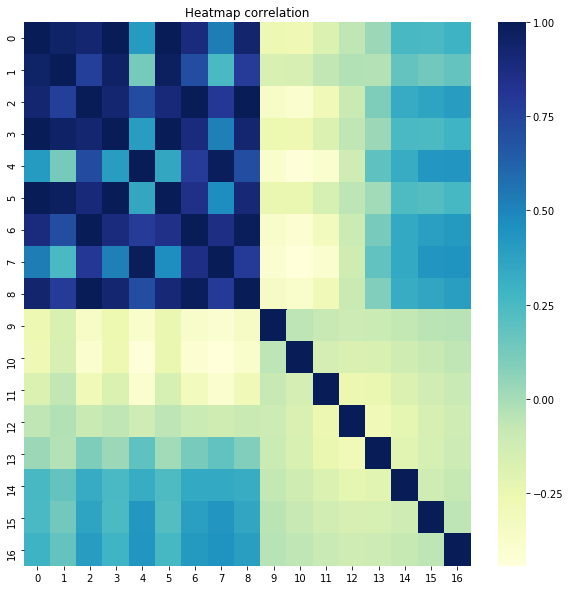

In [7]:
# COMPLETAR: calcular y graficar correlación entre features
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification
# Seguimos la ayuda,
# Calculamos la correlacion del set de entrenamiento
pd_corr=X_train.corr()
# Graficamos
plt.figure(figsize=(10,10))
seaborn.heatmap(pd_corr, cmap="YlGnBu") 
seaborn.set(font_scale=1,style='white')
plt.title('Heatmap correlation')
plt.show()

#### Comentario Mapa de Calor
A partir del mapa de calor observamos 3 regiones (dada la simetria de la matriz solo comentamos lo correspondiente a la matriz triangular inferior).
- [0-8]->[0-8] (esquina superior izquierda): En la misma se observa una alta correlacion entre gran parte del conjunto
- [0-8]->[9-16] (esquina inferior izquierda): En la misma se observa un conjunto poco correlacionado [9-12] y un conjunto con una correlacion mayor [13-16], pero sin llegar a los valores alcanzados por el set anterior.
- [9-16]->[9-16] (esquina inferior derecha): En la misma observamos que las caracteristicas seleccionadas parecen estar descorrelacionadas (o su correlacion es muy pequeña).

Adicionalmente podriamos comentar que el set [0-8] (respecto a el mismo) no parece haber tenido un analisis tipo PCA. Algo similar en relacion a  [0-8]->[9-16].

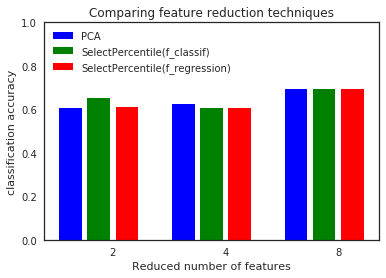

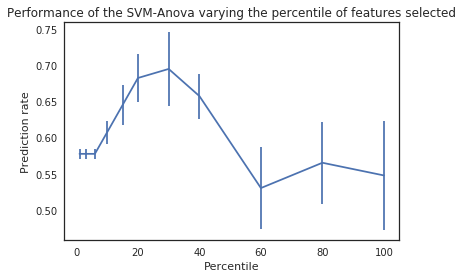

In [8]:
# Para la reduccion de dimensionalidad intentamos seguir algunos ejemplos
# @ http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8]
percentiles = (5, 10, 30,)
C_OPTIONS = [0.01,0.09,1, 10, 100]
param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectPercentile(f_classif),SelectPercentile(f_regression)],
        'reduce_dim__percentile': percentiles,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'SelectPercentile(f_classif)','SelectPercentile(f_regression)']

grid = GridSearchCV(pipe, cv=5, n_jobs=1, param_grid=param_grid)
grid.fit(X_train, Y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

############

# @ http://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py
# Otra alternativa para la reduccion utilziando otro scoring
transform = SelectPercentile(f_classif)
clf = Pipeline([('anova', transform), ('svc', LinearSVC(C=0.9))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X_train, Y_train, n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.figure()    
plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')
plt.axis('tight')
plt.show()

Observamos que el scoring alcanzado es similar para las alternativas de reduccion de dimensionalidad (PCA o feature selection de scikit). Esto bajo el set de condiciones o parametros elegido, lo cual no implica que se puedan alcanzar otros valores utilizando alguna configuracion diferente.

In [9]:
# Utilizamos PCA
# redim
rPCA=PCA(n_components=2,whiten=True,svd_solver='full')
X_train_pca=rPCA.fit_transform(X_train); X_test_pca=rPCA.transform(X_test)
rPCA.explained_variance_ratio_

array([0.9102951 , 0.08965583])

Veamos los graficos de las componentes

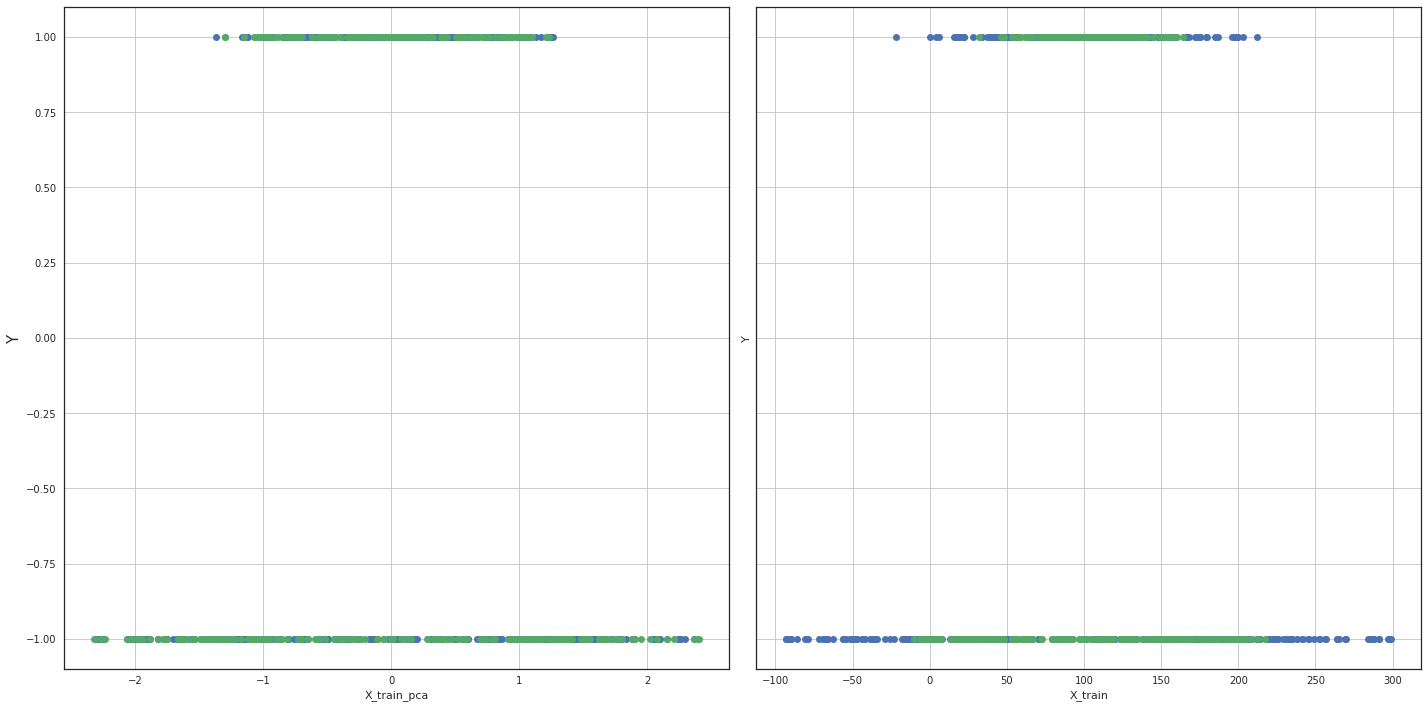

In [10]:
fig,((ax1,ax2))=plt.subplots(1,2,sharey='all')
fig.set_figwidth(20);fig.set_figheight(10);
ax1.plot(X_train_pca[:,0],Y_train[:],'o')
ax1.plot(X_train_pca[:,1],Y_train[:],'o')
ax1.set_xlabel('X_train_pca');ax1.set_ylabel('Y',fontsize=15)
ax1.grid(True)
#
ax2.plot(X_train.values[:,0],Y_train[:],'o')
ax2.plot(X_train.values[:,1],Y_train[:],'o')
ax2.grid(True)
ax2.set_xlabel('X_train');ax2.set_ylabel('Y');
plt.tight_layout()

En ambos casos parece haber superposicion pero los valores devueltos por la PCA parecen estar mas concentrados.

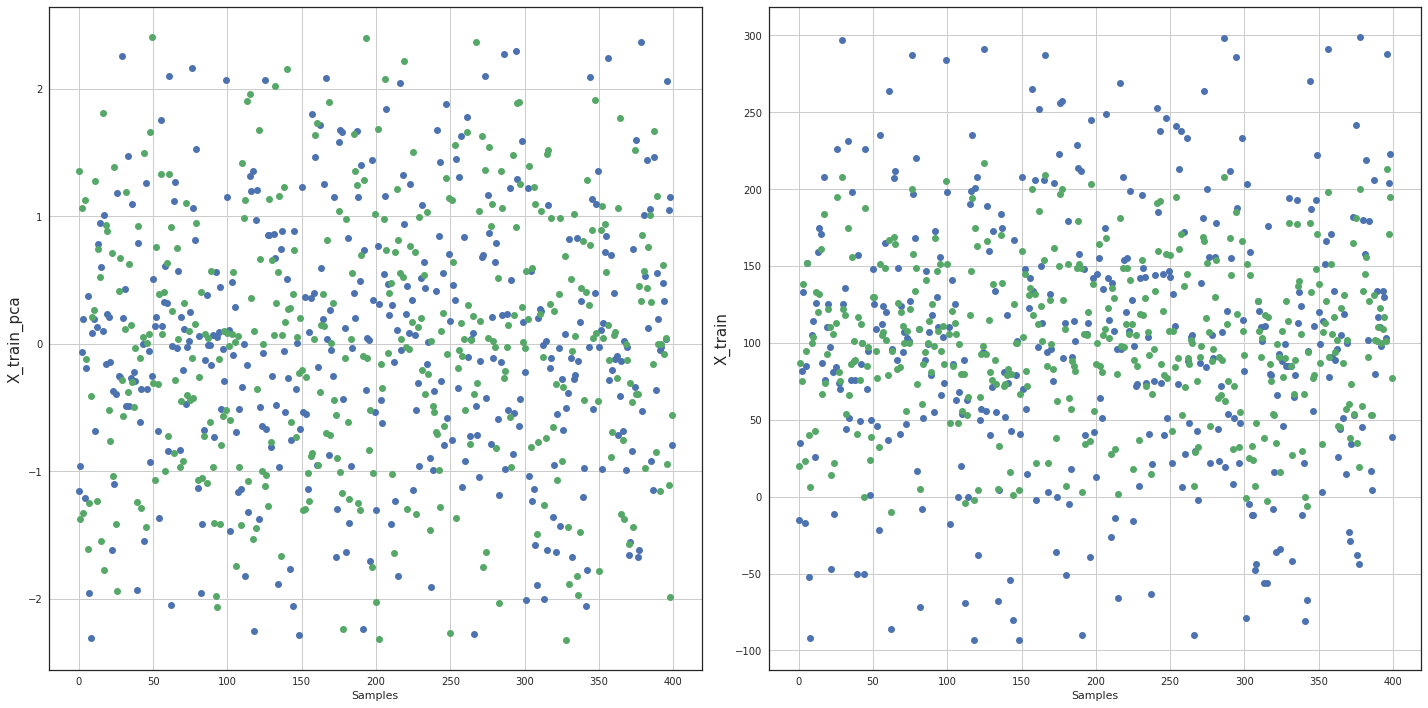

In [11]:
# Veamos los graficos de la PCA simplemente sin componente Y
fig,((ax1,ax2))=plt.subplots(1,2)
fig.set_figwidth(20);fig.set_figheight(10);
ax1.plot(X_train_pca[:,0],'o')
ax1.plot(X_train_pca[:,1],'o')
ax1.set_xlabel('Samples');ax1.set_ylabel('X_train_pca',fontsize=15)
ax1.grid(True)
#
ax2.plot(X_train.values[:,0],'o')
ax2.plot(X_train.values[:,1],'o')
ax2.grid(True)
ax2.set_xlabel('Samples');ax2.set_ylabel('X_train',fontsize=15)
plt.tight_layout()

Para la PCA observamos una varianza grande en los datos (tambien vemos que los datos fueron centrados-esto de acuerdo a las opciones por default de la PCA). El grafico correspondiente a ciertas componentes de los datos originales no intenta ser una comparativa sino poner de manifiesto el comportamiento de los mismos respecto de los samples. Es decir que no esperamos ver una correlacion 1/1 entre estos datos y las componentes principales de la PCA.

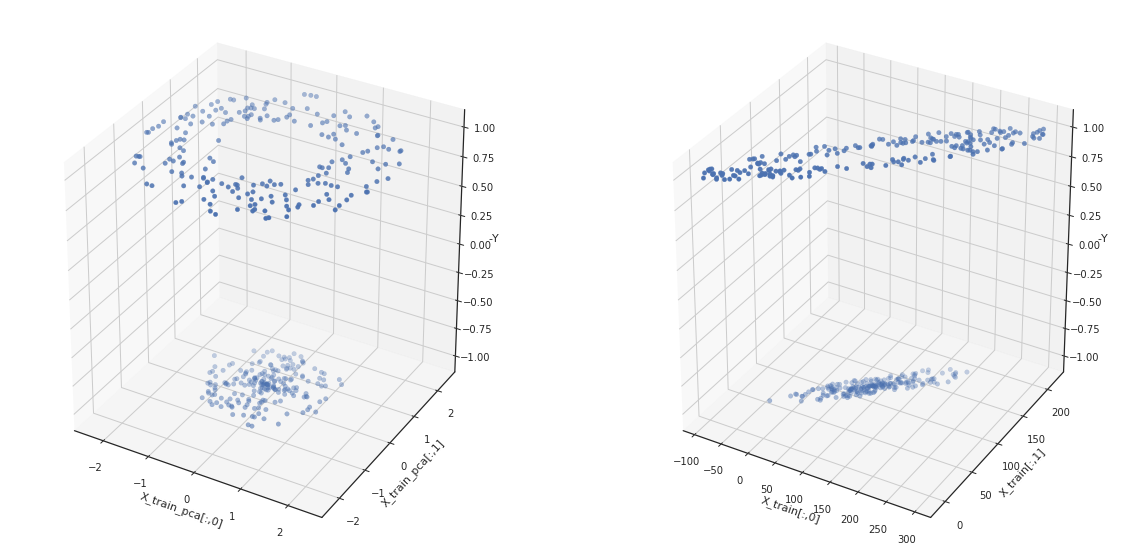

In [12]:
# Veamos un enfoque 3D
from mpl_toolkits.mplot3d import Axes3D
x=X_train_pca[:,0];y=X_train_pca[:,1];z=Y_train
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d',)
ax.scatter(x, y, z*-1,s=20)
ax.set_xlabel('X_train_pca[:,0]');ax.set_ylabel('X_train_pca[:,1]')
ax.set_zlabel('-Y');

x=X_train.values[:,0];y=X_train.values[:,1];z=Y_train
ax = fig.add_subplot(122, projection='3d',)
ax.scatter(x, y, -1*z,s=20)
ax.set_xlabel('X_train[:,0]');ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('-Y');

Observamos que con esta visualizacion y utilizando las componentes PCA la frontera 
de separacion de los datos pareciera ser mas accesible. Esto en funcion de lo visto pareceria ser 
para una SVM con kernel rbf.

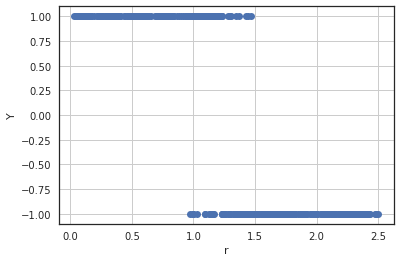

In [13]:
# Veamos si tiramos a "ojo" una transformacion de features
r=(X_train_pca[:,0]**2+X_train_pca[:,1]**2)**(0.5)
fig,ax=plt.subplots(1,1);
ax.plot(r,Y_train,'o')
ax.set_xlabel('r');ax.set_ylabel('Y')
ax.grid(True)
# Todavia observamos cierto overlapping!

### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

**Preguntas:**
- ¿Cuál es la accuracy?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique la SVM para lograr una accuracy en train de 1.0.

In [14]:
# Como viene nomas! y para las componentes originales sin PCA
X_case=X_train;Y_case=Y_train; case_name= 'TRAIN'
model = LinearSVC(random_state=1,C=0.0001,dual=True,tol=1e-4,max_iter=10000,penalty='l2') 
model.fit(X_case, Y_case)
Y_case_pred = model.predict(X_case)
print('Accuracy en '+case_name +':\t', accuracy_score(Y_case, Y_case_pred))

Accuracy en TRAIN:	 0.5325


Accuracy en TRAIN_PCA:	 0.465


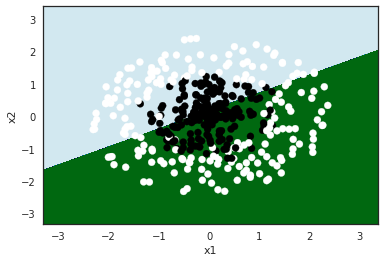

In [15]:
# SI usaramos la PCA
X_case=X_train_pca;Y_case=Y_train; case_name= 'TRAIN_PCA'
model = LinearSVC(random_state=1,C=0.0001,dual=True,tol=1e-4,max_iter=10000,penalty='l2') 
model.fit(X_case, Y_case)
Y_case_pred = model.predict(X_case)
print('Accuracy en '+case_name +':\t', accuracy_score(Y_case, Y_case_pred))
utils.plot_decision_boundary(lambda x: model.predict(x), X_case.T, Y_case.T)

In [16]:
# Haciendo un GridSearchCV SIN PCA
X_case=X_train; Y_case=Y_train; case_name= 'TRAIN'

C_OPTIONS = [1e-6,1e-3,1,10,100]
exploring_params = {'C':C_OPTIONS,'penalty':['l1','l2'],'tol':[1e-6,1e-5,1e-4],'max_iter':[100,1000]}
m = LinearSVC(random_state=1,dual=False) 
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
model.fit(X_case, Y_case)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
#print("Puntajes de la grilla:", end="\n\n")
#means = model.cv_results_['mean_test_score']
#stds = model.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, model.cv_results_['params']):
#    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
#print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto "+ case_name+" ):", end="\n\n")
y_true, y_pred = Y_case, model.predict(X_case)
print(classification_report(y_true, y_pred), end="\n\n")
print("================================================", end="\n\n")
# plot
#utils.plot_decision_boundary(lambda x: model.predict(x), X_case.T, Y_case.T)

Mejor conjunto de parámetros:
{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'tol': 1e-06}

Reporte de clasificación para el mejor clasificador (sobre conjunto TRAIN ):

             precision    recall  f1-score   support

       -1.0       0.97      0.46      0.62       201
        1.0       0.64      0.98      0.78       199

avg / total       0.81      0.72      0.70       400





Mejor conjunto de parámetros:
{'C': 1e-06, 'max_iter': 100, 'penalty': 'l1', 'tol': 1e-06}

Reporte de clasificación para el mejor clasificador (sobre conjunto TRAIN_PCA ):

             precision    recall  f1-score   support

       -1.0       0.50      1.00      0.67       201
        1.0       0.00      0.00      0.00       199

avg / total       0.25      0.50      0.34       400





/home/felix/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


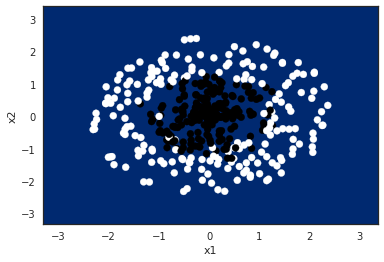

In [17]:
# Haciendo un GridSearchCV CON PCA
X_case=X_train_pca; Y_case=Y_train; case_name= 'TRAIN_PCA'

C_OPTIONS = [1e-6,1e-3,1,10,100]
exploring_params = {'C':C_OPTIONS,'penalty':['l1','l2'],'tol':[1e-6,1e-5,1e-4],'max_iter':[100,1000]}
m = LinearSVC(random_state=1,dual=False) 
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
model.fit(X_case, Y_case)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
#print("Puntajes de la grilla:", end="\n\n")
#means = model.cv_results_['mean_test_score']
#stds = model.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, model.cv_results_['params']):
#    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
#print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto "+ case_name+" ):", end="\n\n")
y_true, y_pred = Y_case, model.predict(X_case)
print(classification_report(y_true, y_pred), end="\n\n")
print("================================================", end="\n\n")
# plot
utils.plot_decision_boundary(lambda x: model.predict(x), X_case.T, Y_case.T)

Basicamente no obtenemos una frontera de desicion.

#### Actualizamos la SVM
De lo comentado anteriormente tenia pinta de ser candidata una SVM con kernel de funciones radiales.

In [18]:
# Sin GridSearch
X_case=X_train;Y_case=Y_train; case_name= 'TRAIN'
model = SVC(kernel="rbf",random_state=1)
model.fit(X_case, Y_case)
Y_case_pred = model.predict(X_case)
print(classification_report(Y_case, Y_case_pred), end="\n\n")
#utils.plot_decision_boundary(lambda x: model.predict(x), X_case.T, Y_case.T)

             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       201
        1.0       1.00      1.00      1.00       199

avg / total       1.00      1.00      1.00       400




             precision    recall  f1-score   support

       -1.0       0.93      0.96      0.94       201
        1.0       0.95      0.93      0.94       199

avg / total       0.94      0.94      0.94       400




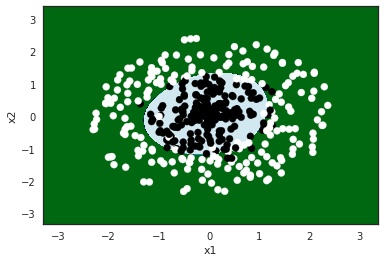

In [19]:
# Sin GridSearch con PCA
X_case=X_train_pca;Y_case=Y_train; case_name= 'TRAIN_PCA'
model = SVC(kernel="rbf",random_state=1)
model.fit(X_case, Y_case)
Y_case_pred = model.predict(X_case)
print(classification_report(Y_case, Y_case_pred), end="\n\n")
utils.plot_decision_boundary(lambda x: model.predict(x), X_case.T, Y_case.T)

Mejor conjunto de parámetros:
{'C': 1000, 'gamma': 0.005385076923076924}

Puntajes de la grilla:

Reporte de clasificación para el mejor clasificador (sobre conjunto TRAIN_PCA ):

             precision    recall  f1-score   support

       -1.0       0.96      0.93      0.94       201
        1.0       0.93      0.96      0.95       199

avg / total       0.95      0.94      0.94       400





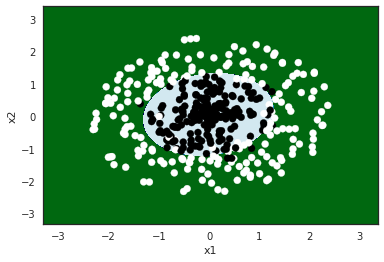

In [21]:
# GridSearch for PCA
X_case=X_train_pca; Y_case=Y_train ; Case= 'TRAIN_PCA';

exploring_params = {'C':[0.001,0.01,1,10,1000],'gamma':np.linspace(1e-6,1e-2,40)}
m = SVC(kernel="rbf",random_state=1) 
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
model.fit(X_case, Y_case)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, model.cv_results_['params']):
#    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
#print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto " + Case+" ):", end="\n\n")
y_true, y_pred = Y_case, model.predict(X_case)
print(classification_report(y_true, y_pred), end="\n\n")
print("================================================", end="\n\n")
utils.plot_decision_boundary(lambda x: model.predict(x), X_case.T, Y_case.T)

En la configuracion default de la SVC (set completo) tenemos score 1 por lo que no corremos todavia un gridsearch.

### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

**Preguntas:**
- ¿Cuál es la accuracy en test?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.

In [22]:
# Nos quedamos con el case X_train (sin PCA)
clf_train = SVC(kernel="rbf",random_state=1)
clf_train.fit(X_train, Y_train);
print('##### TRAIN ######')
predictions = clf_train.predict(X_train)
print(classification_report(Y_train, predictions), end="\n\n")
print('##### TEST ######')
predictions = clf_train.predict(X_test)
print(classification_report(Y_test, predictions), end="\n\n")


##### TRAIN ######
             precision    recall  f1-score   support

       -1.0       1.00      1.00      1.00       201
        1.0       1.00      1.00      1.00       199

avg / total       1.00      1.00      1.00       400


##### TEST ######
             precision    recall  f1-score   support

       -1.0       0.59      0.98      0.74        43
        1.0       0.97      0.49      0.65        57

avg / total       0.80      0.70      0.69       100




In [23]:
# GridSearch for score > 0.9 en test
X_case=X_train; Y_case=Y_train ; Case= 'TRAIN'; 
X_case_test=X_test; Y_case_test=Y_test;Case_Test='TEST'
exploring_params = {'C':[0.001,0.01,1,10,1000],'gamma':np.linspace(1e-6,1e-2,40)}
m = SVC(kernel="rbf",random_state=1) 
model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
model.fit(X_case, Y_case)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, model.cv_results_['params']):
#    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
#print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto " + Case+" ):", end="\n\n")
y_true, y_pred = Y_case, model.predict(X_case)
print(classification_report(y_true, y_pred), end="\n\n")
print("================================================", end="\n\n")
print("Reporte de clasificación para el mejor clasificador (sobre conjunto " + Case_Test+" ):", end="\n\n")
y_true, y_pred = Y_case_test, model.predict(X_case_test)
print(classification_report(y_true, y_pred), end="\n\n")
print("================================================", end="\n\n")

Mejor conjunto de parámetros:
{'C': 1, 'gamma': 0.0005137692307692308}

Puntajes de la grilla:

Reporte de clasificación para el mejor clasificador (sobre conjunto TRAIN ):

             precision    recall  f1-score   support

       -1.0       0.92      0.96      0.94       201
        1.0       0.95      0.91      0.93       199

avg / total       0.94      0.94      0.93       400



Reporte de clasificación para el mejor clasificador (sobre conjunto TEST ):

             precision    recall  f1-score   support

       -1.0       0.81      1.00      0.90        43
        1.0       1.00      0.82      0.90        57

avg / total       0.92      0.90      0.90       100





Cumple en Test (en promedio) >0.9

In [24]:
# Una alternativa pero implica utilizar (no entrenar, sino validar) el set de TEST
import scipy.optimize as scy_opt
def cost_SVC_rbf(gamma_val,X_train,Y_train,X_test,Y_test,train_target,test_target):
        m = SVC(kernel="rbf",random_state=1,gamma=gamma_val[0],C=gamma_val[1])
        m.fit(X_train, Y_train)
        prediction_train=m.predict(X_train)
        p_train=accuracy_score(Y_train,prediction_train)
        prediction_test=m.predict(X_test)
        p_test=accuracy_score(Y_test,prediction_test)
        J= (p_train-train_target)**6+(p_test-test_target)**4
        return J

train_target=1
test_target=1

gamma_opt = scy_opt.minimize(cost_SVC_rbf,np.array([2e-4,1]),
                                  args=(X_train,Y_train,X_test,Y_test,train_target,test_target),
                                  method='SLSQP',
                                  bounds=((1e-6,1e-1),(1e-6,100)),tol=0.00000001,
                                  options={'disp': None, 'ftol': 2.220446049250313e-16, 'eps': 0.00001,  'maxiter': 15000, 'iprint': -1})
print(gamma_opt)

clf_train=SVC(kernel="rbf",random_state=1,gamma=gamma_opt.x[0],C=gamma_opt.x[1]) 
clf_train.fit(X_train,Y_train)
# Verificamos que todo sigue en su lugar
print('##### TRAIN ######')
predictions = clf_train.predict(X_train)
print(classification_report(Y_train, predictions), end="\n\n")
print('##### TEST ######')
predictions = clf_train.predict(X_test)
print(classification_report(Y_test, predictions), end="\n\n")

     fun: 6.570458508032217e-05
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 10
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([3.01106185e-04, 1.00000000e+00])
##### TRAIN ######
             precision    recall  f1-score   support

       -1.0       0.91      0.96      0.93       201
        1.0       0.95      0.91      0.93       199

avg / total       0.93      0.93      0.93       400


##### TEST ######
             precision    recall  f1-score   support

       -1.0       0.83      1.00      0.91        43
        1.0       1.00      0.84      0.91        57

avg / total       0.93      0.91      0.91       100




Alcanzamos valores similares al GridSearchCV. Aunque la definicion de la funcion de costo es todo un tema.

En las situaciones mostradas parece existir una dispersion de datos (varianza) considerable.

## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [25]:
# cargar los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [26]:
# del train['PassengerId']  # eliminar ids
# Acorde a lo expuesto en el post https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook
# se elimina el 'PassengerId' puesto que " It appears that we can drop the PassengerId column, since it is merely an index"
# Adicionalmente eliminamos los que no son numericos tal cual se requiere y los que estan incompletos
train.drop(columns=['PassengerId','Name','Sex','Age','Ticket','Cabin','Embarked'],inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [27]:
# entrenar la misma Random Forest, e imprimir el out-of-bag score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7172


### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [28]:
# cargar nuevamente los datos
train = pd.read_csv('datasets/titanic/train.csv')
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age
train.loc[train['Age'].isna(),'Age']=train['Age'].mean()
train.info();train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# COMPLETAR: agregar columna con el largo del nombre
train['Name_len']=train['Name'].apply(lambda x: len(x))
train.info();train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name_len       891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_len
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,9.281607
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,20.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,25.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000


In [32]:
# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER:
# train['Sex'] = train['Sex'].apply(f)
train['Sex']=train['Sex'].apply(lambda x: 1 if x=='female' else 0)
train.info();train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name_len       891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name_len
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,26.965208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,9.281607
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,12.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,20.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,25.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,30.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,82.000000


In [33]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
train.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Name_len    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [34]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# entrenar el Random Forest, e imprimir out-of-bag score
from sklearn.ensemble import RandomForestClassifier
train.columns.tolist()
cols_lst={'case_age':['Pclass','Age','SibSp','Parch','Fare'],
              'case_name_len':['Pclass','SibSp','Parch','Fare','Name_len'],
              'case_sex':['Pclass','Sex','SibSp','Parch','Fare'],
         'case_age_sex_name_len':['Pclass','Age','Sex','SibSp','Parch','Fare','Name_len']}


### Casos

In [35]:
case_train={}
for ik in cols_lst.keys():
    str_case=ik
    X_train,Y_train=train.loc[:,cols_lst[str_case]],train.loc[:,'Survived']
    rf = RandomForestClassifier(criterion='gini', 
                                 n_estimators=700,
                                 min_samples_split=10,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 oob_score=True,
                                 random_state=1,
                                 n_jobs=-1)
    rf.fit(X_train, Y_train)
    case_train.update({ik:rf})
    print(str_case + ": %.4f" % rf.oob_score_)

case_age: 0.7250
case_name_len: 0.7407
case_sex: 0.8025
case_age_sex_name_len: 0.8305


La mejora correspondiente al 'sexo' es la que parece otorgar un score mayor (para el set de entrenamiento medido con el score OOB).